# Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone by IBM/Coursera/Identify the perfect place in the city of Toronto to open a cafe.


## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)

## Introduction: Business Problem <a name="introduction"></a>

According to Wikipedia, **Toronto is the largest city in Canada**, the administrative center of the province of Ontario. The population is 2,731,571 (2016).
Toronto is part of the" golden horseshoe " — a densely populated region around the western part of Lake Ontario with a population of about 7 million people. **Approximately one-third of the total Canadian population lives within a 500 km radius of Toronto**. About a sixth of all Canadian jobs are located within the city limits.
The city of Toronto is also known as the" economic engine " of Canada, is considered one of the leading megacities in the world and has a great weight both in the region and at the state and international level. In The Economist's annual Global Liveability Ranking, which measures the overall quality of life, **Toronto ranks fourth in the world among 140 participating cities**.
Based on the above, Toronto is a promising city for starting a business. But where is the best place to open your own cafe? I intend to create a solution for aspiring small business entrepreneurs to set up their small business in an urban area.

## Data <a name="data"></a>

This data science capstone project focuses on the process of using location data obtained from data providers such as the Foursquare API, Wikipedia.org

## Methodology<a name="methodology"></a>

Using a K-means cluster, similar locations with minimal distance should be grouped into clusters. This is the simplest form of unsupervised machine learning algorithm, and it helps to group similar data points. 
Data for this project will be extracted, processed, and analyzed by integrating information about the City of Toronto area extracted from the Internet and venue-related information obtained through the Foursquare API.Data extraction from the Internet is done using python web scraper libraries, such as Beautiful Soup. After extracting the html page, the information is converted to a data frame using the python pandas library. Using the pandas library, the data will be cleaned and processed to prepare the final data frame for analysis. To display my data on the map, I will use the Folium library. In addition, to create clusters of similar areas of interest, I will use the k-means clustering method. For this analytical method, I will use the sklearn python library to create a clustering model for my project.
- Environment Preparation
- Data Extraction using Web Scraping Library 
- Transforming the HTML page into a Data Frame
- Data Processing
- Cleaning the Data
In this step, the data frame will be cleaned with respect to missing values, error data values and shall be transformed into a more workable framework for the analytical and machine learning logarithms.
Merging Geographical Coordinates through another data file 
- Data Exploration
- Rendering the Map and Adding the Boroughs
 Using the map rendering libraries, we will now view the boroughs and neighborhoods on the map of Toronto City using the geopy library and add markers to indicate their location 
- Exploring Neighbourhoods using Foursqaure API 
- Machine Learning Algorithm: Clustering and Segmentation of Neighborhoods with Similar Venues


**Environment Preparation**

In [17]:
!conda install -c conda-forge folium=0.12.0 --yes

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::ibm-wsrt-py37main-main==custom=2155
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=2155
  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37ha70c682_1
done

# All requested packages already installed.



In [18]:
!conda install -c conda-forge geopy --yes

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::ibm-wsrt-py37main-main==custom=2155
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=2155
  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37ha70c682_1
done

# All requested packages already installed.



In [ ]:
import requests 
import pandas as pd 
import numpy as np 
import random 
 
from geopy.geocoders import Nominatim

from IPython.display import Image 
from IPython.core.display import HTML 

from IPython.display import display_html
import pandas as pd
import numpy as np

from pandas.io.json import json_normalize
from bs4 import BeautifulSoup

import folium 

from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

**Data Extraction using Web Scraping Library**


In [29]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
source = requests.get(url).text
soup=BeautifulSoup(source,'html5lib')

**Transforming the HTML page into a Data Frame**

In [35]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append({'Postal Code':cell['PostalCode'],'Borough':cell['Borough'],'Neighborhood':cell['Neighborhood']})

In [36]:
df = pd.DataFrame(table_contents)
df.head(15)

Postal Code           Borough  \
0          M3A        North York   
1          M4A        North York   
2          M5A  Downtown Toronto   
3          M6A        North York   
4          M7A      Queen's Park   
5          M9A         Etobicoke   
6          M1B       Scarborough   
7          M3B        North York   
8          M4B         East York   
9          M5B  Downtown Toronto   
10         M6B        North York   
11         M9B         Etobicoke   
12         M1C       Scarborough   
13         M3C        North York   
14         M4C         East York   

                                         Neighborhood  
0                                           Parkwoods  
1                                    Victoria Village  
2                           Regent Park, Harbourfront  
3                    Lawrence Manor, Lawrence Heights  
4                       Ontario Provincial Government  
5                                    Islington Avenue  
6                                      Malvern, Rouge  
7                                     Don Mills North  
8                     Parkview Hill, Woodbine Gardens  
9                            Garden District, Ryerson  
10                                          Glencairn  
11  West Deane Park, Princess Gardens, Martin Grov...  
12             Rouge Hill, Port Union, Highland Creek  
13                                    Don Mills South  
14                                   Woodbine Heights

In [38]:
df = pd.DataFrame(table_contents,columns = ['Postal Code','Borough','Neighborhood'])
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})


In [39]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(15)


Postal Code           Borough  \
0          M3A        North York   
1          M4A        North York   
2          M5A  Downtown Toronto   
3          M6A        North York   
4          M7A      Queen's Park   
5          M9A         Etobicoke   
6          M1B       Scarborough   
7          M3B        North York   
8          M4B         East York   
9          M5B  Downtown Toronto   
10         M6B        North York   
11         M9B         Etobicoke   
12         M1C       Scarborough   
13         M3C        North York   
14         M4C         East York   

                                         Neighborhood  
0                                           Parkwoods  
1                                    Victoria Village  
2                           Regent Park, Harbourfront  
3                    Lawrence Manor, Lawrence Heights  
4                       Ontario Provincial Government  
5                                    Islington Avenue  
6                                      Malvern, Rouge  
7                                     Don Mills North  
8                     Parkview Hill, Woodbine Gardens  
9                            Garden District, Ryerson  
10                                          Glencairn  
11  West Deane Park, Princess Gardens, Martin Grov...  
12             Rouge Hill, Port Union, Highland Creek  
13                                    Don Mills South  
14                                   Woodbine Heights

##  Data Processing¶
**Cleaning the Data**\
In this step, the data frame will be cleaned with respect to missing values, error data values and shall be transformed into a more workable framework for the analytical and machine learning logarithms.

In [40]:
df_postcode = df.groupby(['Postal Code', 'Borough'])['Neighborhood'].apply(', '.join).reset_index()
# creating a new df with PostalCorde, Borough grouped
df_postcode.head(150)


Postal Code                 Borough  \
0           M1B             Scarborough   
1           M1C             Scarborough   
2           M1E             Scarborough   
3           M1G             Scarborough   
4           M1H             Scarborough   
5           M1J             Scarborough   
6           M1K             Scarborough   
7           M1L             Scarborough   
8           M1M             Scarborough   
9           M1N             Scarborough   
10          M1P             Scarborough   
11          M1R             Scarborough   
12          M1S             Scarborough   
13          M1T             Scarborough   
14          M1V             Scarborough   
15          M1W             Scarborough   
16          M1X             Scarborough   
17          M2H              North York   
18          M2J              North York   
19          M2K              North York   
20          M2L              North York   
21          M2M              North York   
22          M2N              North York   
23          M2P              North York   
24          M2R              North York   
25          M3A              North York   
26          M3B              North York   
27          M3C              North York   
28          M3H              North York   
29          M3J              North York   
30          M3K              North York   
31          M3L              North York   
32          M3M              North York   
33          M3N              North York   
34          M4A              North York   
35          M4B               East York   
36          M4C               East York   
37          M4E            East Toronto   
38          M4G               East York   
39          M4H               East York   
40          M4J  East York/East Toronto   
41          M4K            East Toronto   
42          M4L            East Toronto   
43          M4M            East Toronto   
44          M4N         Central Toronto   
45          M4P         Central Toronto   
46          M4R         Central Toronto   
47          M4S         Central Toronto   
48          M4T         Central Toronto   
49          M4V         Central Toronto   
50          M4W        Downtown Toronto   
51          M4X        Downtown Toronto   
52          M4Y        Downtown Toronto   
53          M5A        Downtown Toronto   
54          M5B        Downtown Toronto   
55          M5C        Downtown Toronto   
56          M5E        Downtown Toronto   
57          M5G        Downtown Toronto   
58          M5H        Downtown Toronto   
59          M5J        Downtown Toronto   
60          M5K        Downtown Toronto   
61          M5L        Downtown Toronto   
62          M5M              North York   
63          M5N         Central Toronto   
64          M5P         Central Toronto   
65          M5R         Central Toronto   
66          M5S        Downtown Toronto   
67          M5T        Downtown Toronto   
68          M5V        Downtown Toronto   
69          M5W  Downtown Toronto Stn A   
70          M5X        Downtown Toronto   
71          M6A              North York   
72          M6B              North York   
73          M6C                    York   
74          M6E                    York   
75          M6G        Downtown Toronto   
76          M6H            West Toronto   
77          M6J            West Toronto   
78          M6K            West Toronto   
79          M6L              North York   
80          M6M                    York   
81          M6N                    York   
82          M6P            West Toronto   
83          M6R            West Toronto   
84          M6S            West Toronto   
85          M7A            Queen's Park   
86          M7R             Mississauga   
87          M7Y   East Toronto Business   
88          M8V               Etobicoke   
89          M8W               Etobicoke   
90          M8X               Etobicoke   
91          M8Y               Etobicoke   
92   

**Merging Geographical Coordinates through another data file**

In [41]:
### joining both the dataframes based on postal code:
locgeo_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv', index_col='Postal Code')
toronto_data = df_postcode.join(locgeo_df, on='Postal Code')


In [29]:
# Removing all boroughs which are not assigned and removing any rows with missing longitude or latitude data
toronto_data = toronto_data[toronto_data['Borough'] != 'Not assigned']
toronto_data = toronto_data.dropna(subset=['Latitude', 'Longitude'])
toronto_data.head(12)

Postal Code      Borough  \
0          M1B  Scarborough   
1          M1C  Scarborough   
2          M1E  Scarborough   
3          M1G  Scarborough   
4          M1H  Scarborough   
5          M1J  Scarborough   
6          M1K  Scarborough   
7          M1L  Scarborough   
8          M1M  Scarborough   
9          M1N  Scarborough   
10         M1P  Scarborough   
11         M1R  Scarborough   

                                         Neighborhood   Latitude  Longitude  
0                                      Malvern, Rouge  43.806686 -79.194353  
1              Rouge Hill, Port Union, Highland Creek  43.784535 -79.160497  
2                   Guildwood, Morningside, West Hill  43.763573 -79.188711  
3                                              Woburn  43.770992 -79.216917  
4                                           Cedarbrae  43.773136 -79.239476  
5                                 Scarborough Village  43.744734 -79.239476  
6         Kennedy Park, Ionview, East Birchmount Park  43.727929 -79.262029  
7                     Golden Mile, Clairlea, Oakridge  43.711112 -79.284577  
8     Cliffside, Cliffcrest, Scarborough Village West  43.716316 -79.239476  
9                         Birch Cliff, Cliffside West  43.692657 -79.264848  
10  Dorset Park, Wexford Heights, Scarborough Town...  43.757410 -79.273304  
11                                  Wexford, Maryvale  43.750072 -79.295849

In [42]:
print('The Toronto dataframe has {} boroughs and {} neighborhoods.'.format(len(toronto_data['Borough'].unique()),toronto_data.shape[0]))

The Toronto dataframe has 15 boroughs and 103 neighborhoods.


## Data Exploration
**Rendering the Map and Adding the Boroughs**\
Using the map rendering libraries, we will now view the boroughs and neighborhoods on the map of Toronto City using the geopy library and add markers to indicate their location

In [43]:
address = 'Toronto City'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
tor_lat = location.latitude
tor_lon  = location.longitude
print('The latitude, longitude of Toronto are {}, {}.'.format(round(tor_lat,4),round(tor_lon,4)))

The latitude, longitude of Toronto are 43.6535, -79.3839.


In [44]:
toronto_map = folium.Map(location=[tor_lat, tor_lon], zoom_start=11)

In [369]:
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_map)  
    
toronto_map

**Exploring Neighbourhoods using Foursqaure API**

In [62]:
#Connecting to Foursquare API
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # My Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # My Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [63]:
#Getting a neighborhood's latitude and longitude values.

neighborhood_latitude = toronto_data['Latitude'].iloc[7] # neighborhood latitude value
neighborhood_longitude = toronto_data['Longitude'].iloc[7] # neighborhood longitude value
neighborhood_name = toronto_data['Neighborhood'].iloc[7] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))


Latitude and longitude values of Golden Mile, Clairlea, Oakridge are 43.7111117, -79.2845772.


In [69]:
#Exploring the Postcode of Toronto City using Foursquare API
LIMIT = 100
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    radius, 
    LIMIT)
url

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '608658d4ddfb711b1a6b17de'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Toronto',
  'headerFullLocation': 'Toronto',
  'headerLocationGranularity': 'city',
  'totalResults': 3,
  'suggestedBounds': {'ne': {'lat': 43.71574830900001,
    'lng': -79.58162753348529},
   'sw': {'lat': 43.69774829099999, 'lng': -79.60648126651472}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4be452122457a593c40eaa15',
       'name': 'Tim Hortons',
       'location': {'address': '116 Queens Plate Dr',
        'lat': 43.71465748224628,
        'lng': -79.59371566772467,
        'labeledLatLngs': [{'label': 'display',
         

In [370]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#Clean the json file and create pandas data frame for venues for postcode M5A
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]


print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

nearby_venues.head()

8 venues were returned by Foursquare.


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


name      categories        lat        lng
0                   Dairy Queen  Ice Cream Shop  43.710378 -79.290701
1  Warden Ave & St. Clair Ave E    Intersection  43.712057 -79.281005
2            TTC Bus #68 Warden        Bus Line  43.711778 -79.279714
3       Warden Station Bus Loop     Bus Station  43.711241 -79.279576
4      TTC Bus 102 Markham Road        Bus Line  43.711381 -79.279588

In [4]:
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    VERSION, 
    radius, 
    LIMIT)
url


NameError: name 'CLIENT_ID' is not defined

In [71]:
#Sending the GET request and examine the results
results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '6086591ed274d673707c48cf'},
 'response': {'headerLocation': 'Clairlea - Birchmount',
  'headerFullLocation': 'Clairlea - Birchmount, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 8,
  'suggestedBounds': {'ne': {'lat': 43.7156117045, 'lng': -79.27836331439646},
   'sw': {'lat': 43.706611695499994, 'lng': -79.29079108560354}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bc8e605b6c49c740e5b8d91',
       'name': 'Dairy Queen',
       'location': {'address': '625 Pharmacy Avenue',
        'lat': 43.71037770465013,
        'lng': -79.29070115089417,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.71037770465013,
          'lng': -79.29070115089417}],
        'distance': 499,
        'pos

In [73]:
# function that extracts the category of the venue
def get_category_type(row): # for a given row
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name'] # 'name' is a key inside 'categories'


In [74]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1) #getting the "name" from the "categories" and assigning it to "venue.categories"

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns] # removing the "venue." from the columns

nearby_venues


name      categories        lat        lng
0                   Dairy Queen  Ice Cream Shop  43.710378 -79.290701
1  Warden Ave & St. Clair Ave E    Intersection  43.712057 -79.281005
2            TTC Bus #68 Warden        Bus Line  43.711778 -79.279714
3       Warden Station Bus Loop     Bus Station  43.711241 -79.279576
4      TTC Bus 102 Markham Road        Bus Line  43.711381 -79.279588
5              Bakery On The Go          Bakery  43.711271 -79.279506
6                Cafe on the go          Bakery  43.711151 -79.279469
7             Warden Woods Park            Park  43.710527 -79.278966

In [75]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

8 venues were returned by Foursquare.


In [2]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)-
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results]) # v = "items" from results (includes multiple venues)

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list]) #more than one item per venue_list
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [3]:
nearby_venues.head(15)

NameError: name 'nearby_venues' is not defined

In [94]:
#writting the code to run the above function on each neighborhood and create a new dataframe called toronto_venues:
toronto_venues = getNearbyVenues(toronto_data['Neighborhood'],toronto_data['Latitude'], toronto_data['Longitude'])

In [95]:
toronto_venues.head(15)

Neighborhood  Neighborhood Latitude  \
0                           Malvern, Rouge              43.806686   
1   Rouge Hill, Port Union, Highland Creek              43.784535   
2        Guildwood, Morningside, West Hill              43.763573   
3        Guildwood, Morningside, West Hill              43.763573   
4        Guildwood, Morningside, West Hill              43.763573   
5        Guildwood, Morningside, West Hill              43.763573   
6        Guildwood, Morningside, West Hill              43.763573   
7        Guildwood, Morningside, West Hill              43.763573   
8        Guildwood, Morningside, West Hill              43.763573   
9        Guildwood, Morningside, West Hill              43.763573   
10       Guildwood, Morningside, West Hill              43.763573   
11                                  Woburn              43.770992   
12                                  Woburn              43.770992   
13                                  Woburn              43.770992   
14                               Cedarbrae              43.773136   

    Neighborhood Longitude                         Venue  Venue Latitude  \
0               -79.194353                       Wendy’s       43.807448   
1               -79.160497         Royal Canadian Legion       43.782533   
2               -79.188711                RBC Royal Bank       43.766790   
3               -79.188711             G & G Electronics       43.765309   
4               -79.188711                    Sail Sushi       43.765951   
5               -79.188711              Big Bite Burrito       43.766299   
6               -79.188711         Enterprise Rent-A-Car       43.764076   
7               -79.188711        Krispy Kreme Doughnuts       43.767169   
8               -79.188711         Woburn Medical Centre       43.766631   
9               -79.188711  Lawrence Ave E & Kingston Rd       43.767704   
10              -79.188711                      Eggsmart       43.767800   
11              -79.216917                     Starbucks       43.770037   
12              -79.216917                   Tim Hortons       43.770827   
13              -79.216917            Korean Grill House       43.770812   
14              -79.239476           Federick Restaurant       43.774697   

    Venue Longitude         Venue Category  
0        -79.199056   Fast Food Restaurant  
1        -79.163085                    Bar  
2        -79.191151                   Bank  
3        -79.191537      Electronics Store  
4        -79.191275             Restaurant  
5        -79.190720     Mexican Restaurant  
6        -79.193406    Rental Car Location  
7        -79.189660             Donut Shop  
8        -79.192286         Medical Center  
9        -79.189490           Intersection  
10       -79.190466         Breakfast Spot  
11       -79.221156            Coffee Shop  
12       -79.223078            Coffee Shop  
13       -79.214502  Korean BBQ Restaurant  
14       -79.241142       Hakka Restaurant

In [96]:
toronto_venues.groupby('Venue Category').count()

Neighborhood  Neighborhood Latitude  \
Venue Category                                                         
Accessories Store                           2                      2   
Adult Boutique                              1                      1   
Airport                                     2                      2   
Airport Food Court                          1                      1   
Airport Gate                                1                      1   
Airport Lounge                              2                      2   
Airport Service                             2                      2   
Airport Terminal                            2                      2   
American Restaurant                        22                     22   
Antique Shop                                3                      3   
Aquarium                                    5                      5   
Art Gallery                                14                     14   
Art Museum                                  2                      2   
Arts & Crafts Store                         4                      4   
Asian Restaurant                           12                     12   
Athletics & Sports                          4                      4   
Auto Garage                                 1                      1   
Auto Workshop                               1                      1   
BBQ Joint                                   2                      2   
Baby Store                                  1                      1   
Bagel Shop                                  5                      5   
Bakery                                     39                     39   
Bank                                       30                     30   
Bar                                        25                     25   
Baseball Field                              5                      5   
Baseball Stadium                            2                      2   
Basketball Court                            1                      1   
Basketball Stadium                          4                      4   
Beach                                       1                      1   
Bed & Breakfast                             1                      1   
Beer Bar                                   18                     18   
Beer Store                                  9                      9   
Belgian Restaurant                          2                      2   
Bike Shop                                   2                      2   
Bistro                                      6                      6   
Boat or Ferry                               1                      1   
Bookstore                                  16                     16   
Boutique                                    4                      4   
Brazilian Restaurant                        2                      2   
Breakfast Spot                             23                     23   
Brewery                                    15                     15   
Bridal Shop                                 1                      1   
Bubble Tea Shop                             9                      9   
Building                                    1                      1   
Burger Joint                               16                     16   
Burrito Place                              12                     12   
Bus Line                                    4                      4   
Bus Station                                 2                      2   
Bus Stop                                    2                      2   
Business Service                            1                      1   
Butcher                                     3                      3   
Café                                       93                     93   
Cajun / Creole Restaurant                   1                      1   
Camera Store                                1                      1   
C

In [77]:
# checking the size of the resulting dataframe
print('The Foursquare returned {} venues and {} neighborhoods from the Toronto data'.format(len(toronto_venues['Venue']),len(toronto_venues["Neighborhood"].unique())))
print('There are {} venue categories.'.format(len(toronto_venues['Venue Category'].unique())))


The Foursquare returned 2107 venues and 99 neighborhoods from the Toronto data
There are 269 venue categories.


In [100]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Agincourt                                                               4   
Alderwood, Long Branch                                                  8   
Bathurst Manor, Wilson Heights, Downsview North                        23   
Bayview Village                                                         4   
Bedford Park, Lawrence Manor East                                      22   
Berczy Park                                                            59   
Birch Cliff, Cliffside West                                             4   
Brockton, Parkdale Village, Exhibition Place                           22   
CN Tower, King and Spadina, Railway Lands, Harb...                     15   
Caledonia-Fairbanks                                                     4   
Cedarbrae                                                               8   
Central Bay Street                                                     61   
Christie                                                               16   
Church and Wellesley                                                   77   
Clairville, Humberwood, Woodbine Downs, West Hu...                      3   
Clarks Corners, Tam O'Shanter, Sullivan                                13   
Cliffside, Cliffcrest, Scarborough Village West                         2   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             35   
Davisville North                                                        6   
Del Ray, Mount Dennis, Keelsdale and Silverthorn                        4   
Don Mills North                                                         6   
Don Mills South                                                        19   
Dorset Park, Wexford Heights, Scarborough Town ...                      7   
Downsview Central                                                       2   
Downsview East                                                          3   
Downsview Northwest                                                     3   
Downsview West                                                          5   
Dufferin, Dovercourt Village                                           15   
Enclave of L4W                                                         13   
Enclave of M4L                                                         16   
Enclave of M5E                                                         97   
Eringate, Bloordale Gardens, Old Burnhamthorpe,...                      8   
Fairview, Henry Farm, Oriole                                           62   
First Canadian Place, Underground city                                100   
Forest Hill North & West                                                4   
Garden District, Ryerson                                              100   
Glencairn                                                               4   
Golden Mile, Clairlea, Oakridge                                         8   
Guildwood, Morningside, West Hill                                       9   
Harbourfront East, Union Station, Toronto Islands                     100   
High Park, The Junction South                                          24   
Hillcrest Village                                                       5   
Humber Summit                                                           4   
Humberlea, Emery                                                        1   
Humewood-Cedarvale                                                      4   
India Bazaar, The Beaches West                                         21   
Kennedy Park, Ionview, East Birchmount Park                             6   
Kensington Market, Chinatown, Grange Park                              62   
Kingsview Village, St. Phillips, Martin Grove G...                      4   
Lawrence Manor, Lawrence Heights                

In [101]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column

i=toronto_onehot.columns.get_loc('Neighborhood') #getting the index of "Neighborhood"
fixed_columns = [toronto_onehot.columns[i]] + list(toronto_onehot.columns[:i]) + list(toronto_onehot.columns[i+1:])
toronto_onehot = toronto_onehot[fixed_columns]
print('There are still {} venue categories for {} venues.'.format(toronto_onehot.shape[1],toronto_onehot.shape[0]))
toronto_onehot.head()


There are still 268 venue categories for 2104 venues.


Neighborhood  Accessories Store  Adult Boutique  \
0                          Malvern, Rouge                  0               0   
1  Rouge Hill, Port Union, Highland Creek                  0               0   
2       Guildwood, Morningside, West Hill                  0               0   
3       Guildwood, Morningside, West Hill                  0               0   
4       Guildwood, Morningside, West Hill                  0               0   

   Airport  Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0        0                   0             0               0                0   
1        0                   0             0               0                0   
2        0                   0             0               0                0   
3        0                   0             0               0                0   
4        0                   0             0               0                0   

   Airport Terminal  American Restaurant  Antique Shop  Aquarium  Art Gallery  \
0                 0                    0             0         0            0   
1                 0                    0             0         0            0   
2                 0                    0             0         0            0   
3                 0                    0             0         0            0   
4                 0                    0             0         0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   Auto Garage  Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0            0              0          0           0           0       0   
1            0              0          0           0           0       0   
2            0              0          0           0           0       0   
3            0              0          0           0           0       0   
4            0              0          0           0           0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  \
0     0    0               0                 0                 0   
1     0    1               0                 0                 0   
2     1    0               0                 0                 0   
3     0    0               0                 0                 0   
4     0    0               0                 0                 0   

   Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  Beer Store  \
0                   0      0                0         0           0   
1                   0      0                0         0           0   
2                   0      0                0         0           0   
3                   0      0                0         0           0   
4                   0      0                0         0           0   

   Belgian Restaurant  Bike Shop  Bistro  Boat or Ferry  Bookstore  Boutique  \
0                   0          0       0              0          0         0   
1                   0          0       0              0          0         0   
2                   0          0       0              0          0         0   
3                   0          0       0              0          0         0   
4                   0          0       0              0          0         0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                     0               0        0            0   
1                     0               0        0            0   
2                     0               0        0            0   
3                     0               0        0            0   
4                 

In [350]:
toronto_grouped = toronto_onehot.groupby(["Neighborhood"]).mean().reset_index()

print(toronto_grouped.shape)
toronto_grouped.head()

(99, 268)


Neighborhood  Accessories Store  \
0                                        Agincourt                0.0   
1                           Alderwood, Long Branch                0.0   
2  Bathurst Manor, Wilson Heights, Downsview North                0.0   
3                                  Bayview Village                0.0   
4                Bedford Park, Lawrence Manor East                0.0   

   Adult Boutique  Airport  Airport Food Court  Airport Gate  Airport Lounge  \
0             0.0      0.0                 0.0           0.0             0.0   
1             0.0      0.0                 0.0           0.0             0.0   
2             0.0      0.0                 0.0           0.0             0.0   
3             0.0      0.0                 0.0           0.0             0.0   
4             0.0      0.0                 0.0           0.0             0.0   

   Airport Service  Airport Terminal  American Restaurant  Antique Shop  \
0              0.0               0.0             0.000000           0.0   
1              0.0               0.0             0.000000           0.0   
2              0.0               0.0             0.000000           0.0   
3              0.0               0.0             0.000000           0.0   
4              0.0               0.0             0.045455           0.0   

   Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0       0.0          0.0         0.0                  0.0               0.0   
1       0.0          0.0         0.0                  0.0               0.0   
2       0.0          0.0         0.0                  0.0               0.0   
3       0.0          0.0         0.0                  0.0               0.0   
4       0.0          0.0         0.0                  0.0               0.0   

   Athletics & Sports  Auto Garage  Auto Workshop  BBQ Joint  Baby Store  \
0                 0.0          0.0            0.0        0.0         0.0   
1                 0.0          0.0            0.0        0.0         0.0   
2                 0.0          0.0            0.0        0.0         0.0   
3                 0.0          0.0            0.0        0.0         0.0   
4                 0.0          0.0            0.0        0.0         0.0   

   Bagel Shop  Bakery      Bank  Bar  Baseball Field  Baseball Stadium  \
0         0.0     0.0  0.000000  0.0             0.0               0.0   
1         0.0     0.0  0.000000  0.0             0.0               0.0   
2         0.0     0.0  0.086957  0.0             0.0               0.0   
3         0.0     0.0  0.250000  0.0             0.0               0.0   
4         0.0     0.0  0.000000  0.0             0.0               0.0   

   Basketball Court  Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  \
0               0.0                 0.0    0.0              0.0       0.0   
1               0.0                 0.0    0.0              0.0       0.0   
2               0.0                 0.0    0.0              0.0       0.0   
3               0.0                 0.0    0.0              0.0       0.0   
4               0.0                 0.0    0.0              0.0       0.0   

   Beer Store  Belgian Restaurant  Bike Shop  Bistro  Boat or Ferry  \
0         0.0                 0.0        0.0     0.0            0.0   
1         0.0                 0.0        0.0     0.0            0.0   
2         0.0                 0.0        0.0     0.0            0.0   
3         0.0                 0.0        0.0     0.0            0.0   
4         0.0                 0.0        0.0     0.0            0.0   

   Bookstore  Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  \
0        0.0       0.0                   0.0            0.25      0.0   
1        0.0       0.0                   0.0            0.00      0.0   
2        0.0       0.0                   0.0            0.00      0.0   
3        0.0       0.0                   0.0            0.00      0.0   
4        0.0       0.0             

In [355]:
cafe = toronto_grouped[["Neighborhood","Café"]]

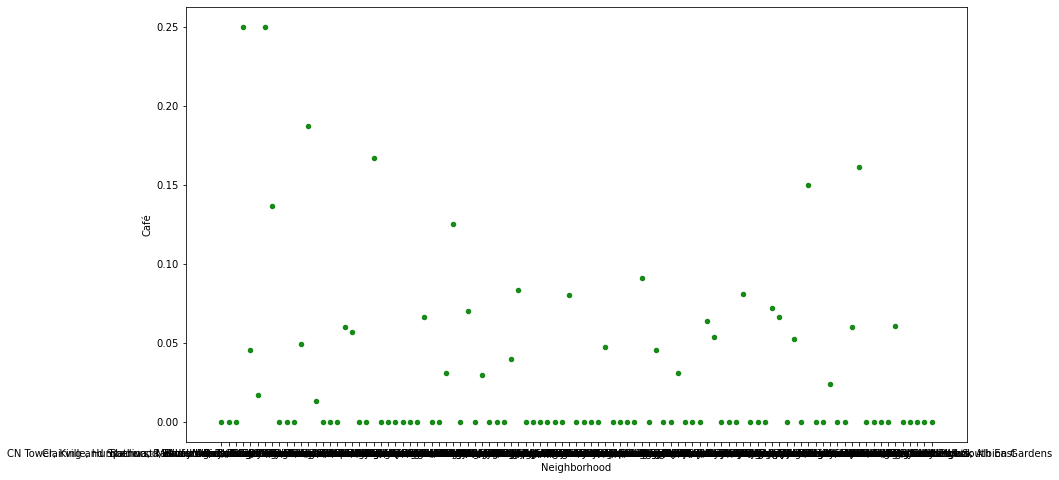

In [248]:
    ax0 = cafe.plot(kind='scatter',
                        x='Neighborhood',
                        y='Café',
                        figsize=(14, 8),
                        alpha=0.9,                  # transparency
                        color='green'
                   )

In [368]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0                     Lounge  0.25
1             Breakfast Spot  0.25
2  Latin American Restaurant  0.25
3               Skating Rink  0.25
4          Accessories Store  0.00


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.25
1             Gym  0.12
2     Coffee Shop  0.12
3             Pub  0.12
4  Sandwich Place  0.12


----Bathurst Manor, Wilson Heights, Downsview North----
                       venue  freq
0                       Bank  0.09
1                Coffee Shop  0.09
2                       Park  0.04
3               Intersection  0.04
4  Middle Eastern Restaurant  0.04


----Bayview Village----
                 venue  freq
0                 Café  0.25
1  Japanese Restaurant  0.25
2                 Bank  0.25
3   Chinese Restaurant  0.25
4    Accessories Store  0.00


----Bedford Park, Lawrence Manor East----
                  venue  freq
0    Italian Restaurant  0.09
1           Coffee Shop

In [351]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:] #not considering the Neighborhood col
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood'] # creating array with cols names
for ind in np.arange(num_top_venues):
    try: #just appending 1st, 2nd 3rd 4th ...
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except: 
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]): 
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues) # [ind,1:]: all rows, all cols from 2nd 

print("there are {} neighborhoods".format(neighborhoods_venues_sorted.shape[0]))
neighborhoods_venues_sorted.head(99)

there are 99 neighborhoods


Neighborhood   1st Most Common Venue  \
0                                           Agincourt                  Lounge   
1                              Alderwood, Long Branch             Pizza Place   
2     Bathurst Manor, Wilson Heights, Downsview North                    Bank   
3                                     Bayview Village                    Café   
4                   Bedford Park, Lawrence Manor East      Italian Restaurant   
5                                         Berczy Park             Coffee Shop   
6                         Birch Cliff, Cliffside West         College Stadium   
7        Brockton, Parkdale Village, Exhibition Place                    Café   
8   CN Tower, King and Spadina, Railway Lands, Har...          Airport Lounge   
9                                 Caledonia-Fairbanks                    Park   
10                                          Cedarbrae    Caribbean Restaurant   
11                                 Central Bay Street             Coffee Shop   
12                                           Christie           Grocery Store   
13                               Church and Wellesley     Japanese Restaurant   
14  Clairville, Humberwood, Woodbine Downs, West H...              Truck Stop   
15            Clarks Corners, Tam O'Shanter, Sullivan    Fast Food Restaurant   
16    Cliffside, Cliffcrest, Scarborough Village West     American Restaurant   
17                     Commerce Court, Victoria Hotel             Coffee Shop   
18                                         Davisville          Sandwich Place   
19                                   Davisville North          Sandwich Place   
20   Del Ray, Mount Dennis, Keelsdale and Silverthorn          Sandwich Place   
21                                    Don Mills North                     Gym   
22                                    Don Mills South                     Gym   
23  Dorset Park, Wexford Heights, Scarborough Town...       Indian Restaurant   
24                                  Downsview Central              Food Truck   
25                                     Downsview East                 Airport   
26                                Downsview Northwest           Grocery Store   
27                                     Downsview West           Grocery Store   
28                       Dufferin, Dovercourt Village                  Bakery   
29                                     Enclave of L4W             Coffee Shop   
30                                     Enclave of M4L      Light Rail Station   
31                                     Enclave of M5E             Coffee Shop   
32  Eringate, Bloordale Gardens, Old Burnhamthorpe...            Liquor Store   
33                       Fairview, Henry Farm, Oriole          Clothing Store   
34             First Canadian Place, Underground city             Coffee Shop   
35                           Forest Hill North & West        Sushi Restaurant   
36                           Garden District, Ryerson             Coffee Shop   
37                                          Glencairn                  Bakery   
38                    Golden Mile, Clairlea, Oakridge                  Bakery   
39                  Guildwood, Morningside, West Hill            Intersection   
40  Harbourfront East, Union Station, Toronto Islands             Coffee Shop   
41                      High Park, The Junction South         Thai Restaurant   
42                                  Hillcrest Village    Fast Food Restaurant   
43                                      Humber Summit             Pizza Place   
44                                   Humberlea, Emery          Baseball Field   
45                                 Humewood-Cedarvale              Playground   
46                     India Bazaar, The Beaches West    Fast Food Restaurant   
47        Kennedy Park, Ionview, East Birchmount Park          Discount Store   
48          Kensington Market, Chinatown, Grange Park                   

**Machine Learning Algorithm: Clustering and Segmentation of Neighborhoods with Similar Venues**

In [110]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = cafe.drop(['Neighborhood'], axis=1)
kmeans.fit(X)
kmeans.labels_[0:10]

array([2, 2, 2, 1, 0, 2, 1, 1, 2, 2], dtype=int32)

In [111]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [112]:
scores = [get_inertia(x) for x in range(2, 21)]

Text(0, 0.5, 'Error')

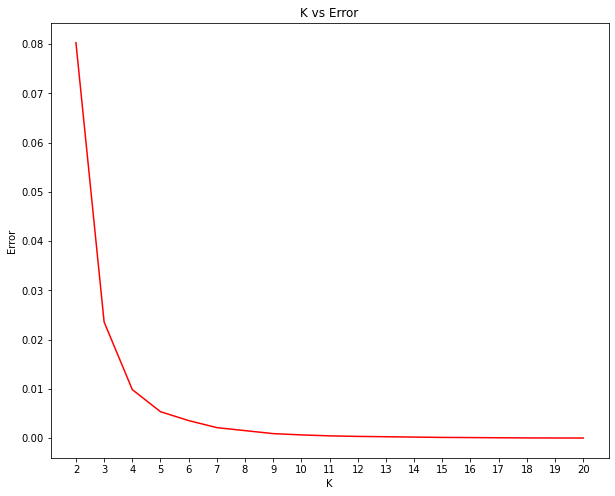

In [113]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

In [327]:
kclusters = 4

toronto_grouped_clustering = cafe.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 3, 2, 3, 3, 3, 0, 0], dtype=int32)

In [261]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
to_merged = cafe.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

In [356]:
print(to_merged.shape)
to_merged.head()


(2104, 9)


Neighborhood  Café  Cluster Labels  Neighborhood Latitude  \
0                  Agincourt   0.0               0              43.794200   
35  Forest Hill North & West   0.0               0              43.696948   
35  Forest Hill North & West   0.0               0              43.696948   
35  Forest Hill North & West   0.0               0              43.696948   
35  Forest Hill North & West   0.0               0              43.696948   

    Neighborhood Longitude                            Venue  Venue Latitude  \
0               -79.262029      Panagio's Breakfast & Lunch       43.792370   
35              -79.411307       Kay Gardner Beltline Trail       43.698446   
35              -79.411307            Forest Hill Road Park       43.697945   
35              -79.411307  Nikko Sushi Japenese Restaurant       43.700443   
35              -79.411307                   Oliver jewelry       43.700374   

    Venue Longitude    Venue Category  
0        -79.260203    Breakfast Spot  
35       -79.406873             Trail  
35       -79.406605              Park  
35       -79.407957  Sushi Restaurant  
35       -79.407644     Jewelry Store

In [347]:
# sort the results by Cluster Labels
print(to_merged.shape)
to_merged.sort_values(['Cluster Labels'], inplace=True)
to_merged

(2104, 9)


Neighborhood      Café  \
0                                           Agincourt  0.000000   
35                           Forest Hill North & West  0.000000   
35                           Forest Hill North & West  0.000000   
35                           Forest Hill North & West  0.000000   
35                           Forest Hill North & West  0.000000   
37                                          Glencairn  0.000000   
37                                          Glencairn  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
37                                          Glencairn  0.000000   
38                    Golden Mile, Clairlea, Oakridge  0.000000   
38                    Golden Mile, Clairlea, Oakridge  0.000000   
38                    Golden Mile, Clairlea, Oakridge  0.000000   
38                    Golden Mile, Clairlea, Oakridge  0.000000   
38                    Golden Mile, Clairlea, Oakridge  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
37                                          Glencairn  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
38                    Golden Mile, Clairlea, Oakridge  0.000000   
38                    Golden Mile, Clairlea, Oakridge  0.000000   
90                                          Westmount  0.000000   
39                  Guildwood, Morningside, West Hill  0.000000   
39                  Guildwood, Morningside, West Hill  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
39                  Guildwood, Morningside, West Hill  0.000000   
39                  Guildwood, Morningside, West Hill  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
38                    Golden Mile, Clairlea, Oakridge  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
39                  Guildwood, Morningside, West Hill  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
46                     India Bazaar, The Beaches West  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
39                  Guildwood, Morningside, West Hill  0.000000   
39                  Guildwood, Morningside, West Hill  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
33                       Fairview, Henry Farm, Oriole  0.000000   
39                  Guildwood, Morningside, West Hill  0.000000   
46                     India Bazaar, The Beaches West  0.000000   
46                     India Bazaar, The Beaches West  0.000000   
46                     India Bazaar, The Beaches West  0.000000   
46                     India Bazaar, The Beaches West  0.000000   
46                   

In [334]:
print("there are still {} neighborhoods such as the neighborhoods_venues_sorted".format(to_merged.shape[0]))



there are still 2104 neighborhoods such as the neighborhoods_venues_sorted


In [336]:
to_merged['Venue Category'].value_counts()['Café']

93

In [375]:
# create map
map_clusters = folium.Map(location=[tor_lat, tor_lon], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Venue Latitude'], to_merged['Venue Longitude'], to_merged['Neighborhood'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.75).add_to(map_clusters)
       
map_clusters


In [377]:
cafe["Cluster Labels"] = kmeans.labels_
cafe.head(100)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Neighborhood      Café  \
0                                           Agincourt  0.000000   
1                              Alderwood, Long Branch  0.000000   
2     Bathurst Manor, Wilson Heights, Downsview North  0.000000   
3                                     Bayview Village  0.250000   
4                   Bedford Park, Lawrence Manor East  0.045455   
5                                         Berczy Park  0.016949   
6                         Birch Cliff, Cliffside West  0.250000   
7        Brockton, Parkdale Village, Exhibition Place  0.136364   
8   CN Tower, King and Spadina, Railway Lands, Har...  0.000000   
9                                 Caledonia-Fairbanks  0.000000   
10                                          Cedarbrae  0.000000   
11                                 Central Bay Street  0.049180   
12                                           Christie  0.187500   
13                               Church and Wellesley  0.012987   
14  Clairville, Humberwood, Woodbine Downs, West H...  0.000000   
15            Clarks Corners, Tam O'Shanter, Sullivan  0.000000   
16    Cliffside, Cliffcrest, Scarborough Village West  0.000000   
17                     Commerce Court, Victoria Hotel  0.060000   
18                                         Davisville  0.057143   
19                                   Davisville North  0.000000   
20   Del Ray, Mount Dennis, Keelsdale and Silverthorn  0.000000   
21                                    Don Mills North  0.166667   
22                                    Don Mills South  0.000000   
23  Dorset Park, Wexford Heights, Scarborough Town...  0.000000   
24                                  Downsview Central  0.000000   
25                                     Downsview East  0.000000   
26                                Downsview Northwest  0.000000   
27                                     Downsview West  0.000000   
28                       Dufferin, Dovercourt Village  0.066667   
29                                     Enclave of L4W  0.000000   
30                                     Enclave of M4L  0.000000   
31                                     Enclave of M5E  0.030928   
32  Eringate, Bloordale Gardens, Old Burnhamthorpe...  0.125000   
33                       Fairview, Henry Farm, Oriole  0.000000   
34             First Canadian Place, Underground city  0.070000   
35                           Forest Hill North & West  0.000000   
36                           Garden District, Ryerson  0.030000   
37                                          Glencairn  0.000000   
38                    Golden Mile, Clairlea, Oakridge  0.000000   
39                  Guildwood, Morningside, West Hill  0.000000   
40  Harbourfront East, Union Station, Toronto Islands  0.040000   
41                      High Park, The Junction South  0.083333   
42                                  Hillcrest Village  0.000000   
43                                      Humber Summit  0.000000   
44                                   Humberlea, Emery  0.000000   
45                                 Humewood-Cedarvale  0.000000   
46                     India Bazaar, The Beaches West  0.000000   
47        Kennedy Park, Ionview, East Birchmount Park  0.000000   
48          Kensington Market, Chinatown, Grange Park  0.080645   
49  Kingsview Village, St. Phillips, Martin Grove ...  0.000000   
50                   Lawrence Manor, Lawrence Heights  0.000000   
51                                      Lawrence Park  0.000000   
52                                            Leaside  0.000000   
53                           Little Portugal, Trinity  0.047619   
54                                     Malvern, Rouge  0.000000   
55  Milliken, Agincourt North, Steeles East, L'Amo...  0.000000   
56  Mimico NW, The Queensway West, South of Bloor,...  0.000000   
57                        Moore Park, Summerhill East  0.000000   
58       New Toronto, Mimico South, Humber Bay Shores  0.090909   
59           North Pa

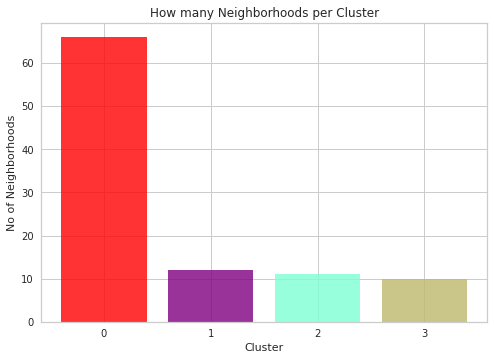

In [381]:
objects = (0,1,2,3)
y_pos = np.arange(len(objects))
performance = cafe['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show()

In [271]:
# How many neighborhoods in each cluster
cafe['Cluster Labels'].value_counts()

0    66
3    12
1    11
2    10
Name: Cluster Labels, dtype: int64

## Analysis of each Cluster
**Cluster '0'**

In [274]:
# This will create a dataframe with borough of each neighborhood which we will merge with each cluster dataframe
df_new = df[['Borough', 'Neighborhood']]
df_new.head(8)

Borough                      Neighborhood
0        North York                         Parkwoods
1        North York                  Victoria Village
2  Downtown Toronto         Regent Park, Harbourfront
3        North York  Lawrence Manor, Lawrence Heights
4      Queen's Park     Ontario Provincial Government
5         Etobicoke                  Islington Avenue
6       Scarborough                    Malvern, Rouge
7        North York                   Don Mills North

In [275]:
# Red 

cluster = to_merged.loc[to_merged['Cluster Labels'] == 0]
df_cluster = pd.merge(df_new, cluster, on='Neighborhood')
df_cluster

Borough  \
0                North York   
1                North York   
2                North York   
3                North York   
4                North York   
5                North York   
6                North York   
7                North York   
8                North York   
9                North York   
10               North York   
11               North York   
12               North York   
13               North York   
14               North York   
15               North York   
16               North York   
17               North York   
18               North York   
19               North York   
20               North York   
21               North York   
22              Scarborough   
23                East York   
24                East York   
25                East York   
26                East York   
27                East York   
28                East York   
29                East York   
30                East York   
31                East York   
32                East York   
33                East York   
34               North York   
35               North York   
36               North York   
37               North York   
38              Scarborough   
39               North York   
40               North York   
41               North York   
42               North York   
43               North York   
44               North York   
45               North York   
46               North York   
47               North York   
48               North York   
49               North York   
50               North York   
51               North York   
52               North York   
53               North York   
54               North York   
55               North York   
56               North York   
57               North York   
58                East York   
59                East York   
60                East York   
61                East York   
62                East York   
63                East York   
64                East York   
65                     York   
66                     York   
67                     York   
68                     York   
69              Scarborough   
70              Scarborough   
71              Scarborough   
72              Scarborough   
73              Scarborough   
74              Scarborough   
75              Scarborough   
76              Scarborough   
77              Scarborough   
78             East Toronto   
79             East Toronto   
80             East Toronto   
81             East Toronto   
82                     York   
83                     York   
84                     York   
85                     York   
86              Scarborough   
87              Scarborough   
88              Scarborough   
89                East York   
90                East York   
91                East York   
92                East York   
93                East York   
94                East York   
95                East York   
96                East York   
97                East York   
98                East York   
99                East York   
100               East York   
101               East York   
102               East York   
103               East York   
104               East York   
105               East York   
106               East York   
107               East York   
108               East York   
109               East York   
110               East York   
111               East York   
112               East York   
113               East York   
114               East York   
115               East York   
116               East York   
117               East York   
118               East York   
119               East York   
120               East York   
121               East York   
122             Scarborough   
123             Scarborough   
124             Scarborough   
125             Scarborough   
126             Scarborough   
127             Scarborough   
128             Scarb

In [276]:
df_cluster.sort_values(["Café"], ascending=False)

Borough  \
500        Downtown Toronto   
512        Downtown Toronto   
514        Downtown Toronto   
515        Downtown Toronto   
516        Downtown Toronto   
517        Downtown Toronto   
518        Downtown Toronto   
519        Downtown Toronto   
520        Downtown Toronto   
521        Downtown Toronto   
522        Downtown Toronto   
523        Downtown Toronto   
524        Downtown Toronto   
525        Downtown Toronto   
526        Downtown Toronto   
527        Downtown Toronto   
529        Downtown Toronto   
530        Downtown Toronto   
531        Downtown Toronto   
532        Downtown Toronto   
533        Downtown Toronto   
534        Downtown Toronto   
535        Downtown Toronto   
536        Downtown Toronto   
537        Downtown Toronto   
513        Downtown Toronto   
511        Downtown Toronto   
539        Downtown Toronto   
510        Downtown Toronto   
486        Downtown Toronto   
487        Downtown Toronto   
488        Downtown Toronto   
489        Downtown Toronto   
490        Downtown Toronto   
491        Downtown Toronto   
492        Downtown Toronto   
493        Downtown Toronto   
494        Downtown Toronto   
495        Downtown Toronto   
496        Downtown Toronto   
497        Downtown Toronto   
498        Downtown Toronto   
499        Downtown Toronto   
501        Downtown Toronto   
502        Downtown Toronto   
503        Downtown Toronto   
504        Downtown Toronto   
505        Downtown Toronto   
506        Downtown Toronto   
507        Downtown Toronto   
508        Downtown Toronto   
509        Downtown Toronto   
538        Downtown Toronto   
528        Downtown Toronto   
540        Downtown Toronto   
552        Downtown Toronto   
541        Downtown Toronto   
562        Downtown Toronto   
561        Downtown Toronto   
560        Downtown Toronto   
559        Downtown Toronto   
558        Downtown Toronto   
557        Downtown Toronto   
555        Downtown Toronto   
554        Downtown Toronto   
553        Downtown Toronto   
556        Downtown Toronto   
551        Downtown Toronto   
550        Downtown Toronto   
549        Downtown Toronto   
548        Downtown Toronto   
547        Downtown Toronto   
546        Downtown Toronto   
545        Downtown Toronto   
544        Downtown Toronto   
543        Downtown Toronto   
542        Downtown Toronto   
371            West Toronto   
367            West Toronto   
368            West Toronto   
369            West Toronto   
370            West Toronto   
404             Scarborough   
372            West Toronto   
373            West Toronto   
374            West Toronto   
403             Scarborough   
365            West Toronto   
366            West Toronto   
354             Scarborough   
364            West Toronto   
363              North York   
362              North York   
361              North York   
360              North York   
359              North York   
358              North York   
357             Scarborough   
356             Scarborough   
355             Scarborough   
401             Scarborough   
353             Scarborough   
402             Scarborough   
390             Mississauga   
400             Scarborough   
386             Mississauga   
351               Etobicoke   
376            West Toronto   
377            West Toronto   
378            West Toronto   
379             Mississauga   
380             Mississauga   
381             Mississauga   
382             Mississauga   
383             Mississauga   
384             Mississauga   
385             Mississauga   
387             Mississauga   
399             Scarborough   
388             Mississauga   
389             Mississauga   
375            West Toronto   
391             Mississauga   
392               Etobicoke   
393               Etobicoke   
394               Etobicoke   
395               Etobicoke   
396             Scarborough   
397             Scarb

In [277]:
df_cluster['Venue Category'].value_counts(ascending=False)['Café']

1

In [278]:
# Purple 
cluster1=to_merged.loc[to_merged['Cluster Labels'] == 1]
df_cluster1 = pd.merge(df_new, cluster1, on='Neighborhood')
df_cluster1

Borough                                       Neighborhood  \
0    Downtown Toronto                                 Central Bay Street   
1    Downtown Toronto                                 Central Bay Street   
2    Downtown Toronto                                 Central Bay Street   
3    Downtown Toronto                                 Central Bay Street   
4    Downtown Toronto                                 Central Bay Street   
5    Downtown Toronto                                 Central Bay Street   
6    Downtown Toronto                                 Central Bay Street   
7    Downtown Toronto                                 Central Bay Street   
8    Downtown Toronto                                 Central Bay Street   
9    Downtown Toronto                                 Central Bay Street   
10   Downtown Toronto                                 Central Bay Street   
11   Downtown Toronto                                 Central Bay Street   
12   Downtown Toronto                                 Central Bay Street   
13   Downtown Toronto                                 Central Bay Street   
14   Downtown Toronto                                 Central Bay Street   
15   Downtown Toronto                                 Central Bay Street   
16   Downtown Toronto                                 Central Bay Street   
17   Downtown Toronto                                 Central Bay Street   
18   Downtown Toronto                                 Central Bay Street   
19   Downtown Toronto                                 Central Bay Street   
20   Downtown Toronto                                 Central Bay Street   
21   Downtown Toronto                                 Central Bay Street   
22   Downtown Toronto                                 Central Bay Street   
23   Downtown Toronto                                 Central Bay Street   
24   Downtown Toronto                                 Central Bay Street   
25   Downtown Toronto                                 Central Bay Street   
26   Downtown Toronto                                 Central Bay Street   
27   Downtown Toronto                                 Central Bay Street   
28   Downtown Toronto                                 Central Bay Street   
29   Downtown Toronto                                 Central Bay Street   
30   Downtown Toronto                                 Central Bay Street   
31   Downtown Toronto                                 Central Bay Street   
32   Downtown Toronto                                 Central Bay Street   
33   Downtown Toronto                                 Central Bay Street   
34   Downtown Toronto                                 Central Bay Street   
35   Downtown Toronto                                 Central Bay Street   
36   Downtown Toronto                                 Central Bay Street   
37   Downtown Toronto                                 Central Bay Street   
38   Downtown Toronto                                 Central Bay Street   
39   Downtown Toronto                                 Central Bay Street   
40   Downtown Toronto                                 Central Bay Street   
41   Downtown Toronto                                 Central Bay Street   
42   Downtown Toronto                                 Central Bay Street   
43   Downtown Toronto                                 Central Bay Street   
44   Downtown Toronto                                 Central Bay Street   
45   Downtown Toronto                                 Central Bay Street   
46   Downtown Toronto                                 Central Bay Street   
47   Downtown Toronto                                 Central Bay Street   
48   Downtown Toronto                                 Central Bay Street   
49   Downtown Toronto                                 Central Bay Street   
50   Downtown Toronto                                 Central Bay Street   
51   Downtown Toronto                                 Central 

In [279]:
df_cluster1['Venue Category'].value_counts(ascending=False)['Café']

29

In [280]:
cluster2 = to_merged.loc[to_merged['Cluster Labels'] == 2]
df_cluster2 = pd.merge(df_new, cluster2, on='Neighborhood')
df_cluster2

Borough  \
0              Queen's Park   
1              Queen's Park   
2              Queen's Park   
3              Queen's Park   
4              Queen's Park   
5              Queen's Park   
6              Queen's Park   
7              Queen's Park   
8              Queen's Park   
9              Queen's Park   
10             Queen's Park   
11             Queen's Park   
12             Queen's Park   
13             Queen's Park   
14             Queen's Park   
15             Queen's Park   
16             Queen's Park   
17             Queen's Park   
18             Queen's Park   
19             Queen's Park   
20             Queen's Park   
21             Queen's Park   
22             Queen's Park   
23             Queen's Park   
24             Queen's Park   
25             Queen's Park   
26             Queen's Park   
27             Queen's Park   
28             Queen's Park   
29             Queen's Park   
30             Queen's Park   
31             Queen's Park   
32         Downtown Toronto   
33         Downtown Toronto   
34         Downtown Toronto   
35         Downtown Toronto   
36         Downtown Toronto   
37         Downtown Toronto   
38         Downtown Toronto   
39         Downtown Toronto   
40         Downtown Toronto   
41         Downtown Toronto   
42         Downtown Toronto   
43         Downtown Toronto   
44         Downtown Toronto   
45         Downtown Toronto   
46         Downtown Toronto   
47         Downtown Toronto   
48         Downtown Toronto   
49         Downtown Toronto   
50         Downtown Toronto   
51         Downtown Toronto   
52         Downtown Toronto   
53         Downtown Toronto   
54         Downtown Toronto   
55         Downtown Toronto   
56         Downtown Toronto   
57         Downtown Toronto   
58         Downtown Toronto   
59         Downtown Toronto   
60         Downtown Toronto   
61         Downtown Toronto   
62         Downtown Toronto   
63         Downtown Toronto   
64         Downtown Toronto   
65         Downtown Toronto   
66         Downtown Toronto   
67         Downtown Toronto   
68         Downtown Toronto   
69         Downtown Toronto   
70         Downtown Toronto   
71         Downtown Toronto   
72         Downtown Toronto   
73         Downtown Toronto   
74         Downtown Toronto   
75         Downtown Toronto   
76         Downtown Toronto   
77         Downtown Toronto   
78         Downtown Toronto   
79         Downtown Toronto   
80         Downtown Toronto   
81         Downtown Toronto   
82         Downtown Toronto   
83         Downtown Toronto   
84         Downtown Toronto   
85         Downtown Toronto   
86         Downtown Toronto   
87         Downtown Toronto   
88         Downtown Toronto   
89         Downtown Toronto   
90         Downtown Toronto   
91         Downtown Toronto   
92         Downtown Toronto   
93         Downtown Toronto   
94         Downtown Toronto   
95         Downtown Toronto   
96         Downtown Toronto   
97         Downtown Toronto   
98         Downtown Toronto   
99         Downtown Toronto   
100        Downtown Toronto   
101        Downtown Toronto   
102        Downtown Toronto   
103        Downtown Toronto   
104        Downtown Toronto   
105        Downtown Toronto   
106        Downtown Toronto   
107        Downtown Toronto   
108        Downtown Toronto   
109        Downtown Toronto   
110        Downtown Toronto   
111        Downtown Toronto   
112        Downtown Toronto   
113        Downtown Toronto   
114        Downtown Toronto   
115        Downtown Toronto   
116        Downtown Toronto   
117        Downtown Toronto   
118        Downtown Toronto   
119        Downtown Toronto   
120        Downtown Toronto   
121        Downtown Toronto   
122        Downtown Toronto   
123        Downtown Toronto   
124        Downtown Toronto   
125        Downtown Toronto   
126        Downtown Toronto   
127        Downtown Toronto   
128        Downtown T

In [281]:
df_cluster2['Venue Category'].value_counts(ascending=False)['Café']

18

In [282]:
cluster3 = to_merged.loc[to_merged['Cluster Labels'] == 3]
df_cluster3 = pd.merge(df_new, cluster3, on='Neighborhood')
df_cluster3

Borough                              Neighborhood      Café  \
0    Downtown Toronto                 Regent Park, Harbourfront  0.063830   
1    Downtown Toronto                 Regent Park, Harbourfront  0.063830   
2    Downtown Toronto                 Regent Park, Harbourfront  0.063830   
3    Downtown Toronto                 Regent Park, Harbourfront  0.063830   
4    Downtown Toronto                 Regent Park, Harbourfront  0.063830   
5    Downtown Toronto                 Regent Park, Harbourfront  0.063830   
6    Downtown Toronto                 Regent Park, Harbourfront  0.063830   
7    Downtown Toronto                 Regent Park, Harbourfront  0.063830   
8    Downtown Toronto                 Regent Park, Harbourfront  0.063830   
9    Downtown Toronto                 Regent Park, Harbourfront  0.063830   
10   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
11   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
12   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
13   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
14   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
15   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
16   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
17   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
18   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
19   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
20   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
21   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
22   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
23   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
24   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
25   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
26   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
27   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
28   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
29   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
30   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
31   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
32   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
33   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
34   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
35   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
36   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
37   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
38   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
39   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
40   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
41   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
42   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
43   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
44   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
45   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
46   Downtown Toronto                 Regent Park, Harbourfront  0.063830   
47         North York                           Don Mills North  0.166667   
48         North York                           Don Mills North  0.166667   
49         North York                           Don Mills North  0.166667   
50         North York                           Don Mills North  0.166667   
51        

In [289]:
df_cluster3['Venue Category'].value_counts(ascending=False)['Café']

45

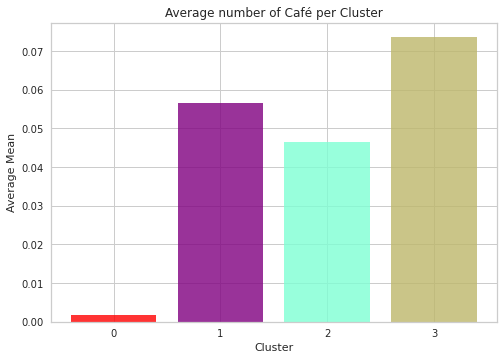

In [383]:

clusters_mean = [df_cluster['Café'].mean(),df_cluster1['Café'].mean(),df_cluster2['Café'].mean(),
                 df_cluster3['Café'].mean()]
objects = (0,1,2,3)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Average Mean')
plt.xlabel('Cluster')
plt.title('Average number of Café per Cluster')

plt.show()

## Results
**Clustering model using machine learning to determine optimal neighborhoods for creating a local cafe**\
Now, using a machine learning model to cluster similar areas with entertainment venues and office centers, I will determine the best places where a customer can open their own coffee shops without much competition within a radius of one kilometer.Having identified all the nearest and most common places within a kilometer radius, I filtered out those areas where there are no cafes or coffee shops nearby. The code below helped me eliminate the likely competitors that would be the main concern for a customer who is just about to open their own cafe.